<a href="https://colab.research.google.com/github/abhash896/house_price_prediction/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading data from Kaggle

In [125]:
# Installing the kaggle library
!pip install -q kaggle

# Making a directory to store the data
!mkdir ~/.kaggle/


# Copying the kaggle.json file into this new directory
!cp kaggle.json ~/.kaggle/


# Allocating the required permission for this file
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [126]:
# Downloading the competition dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques  

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [127]:
# Unzipping the downloaded file
!unzip house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


# Exploratory Data Analysis

In [199]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

In [200]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [201]:
train_df.shape

(1460, 81)

In [202]:
test_df.shape

(1459, 80)

In [203]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [204]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [205]:
sample_submission_df = pd.read_csv('/content/sample_submission.csv')

In [206]:
sample_submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [207]:
train_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Since the training sample size is too small, we can try concatenating both training and testing data to have more information for training our model.

In [209]:
target = train_df['SalePrice']
test_ids = test_df['Id']
n_train = train_df.shape[0]
n_test = test_df.shape[0]
# Dropping Id and SalePrice from train_df 
train_df1 = train_df.drop(['Id', 'SalePrice'], axis = 1)

# Dropping Id from test_df
test_df1 = test_df.drop(['Id'], axis = 1)

data_all = pd.concat([train_df1, test_df1], axis = 0)


In [210]:
data_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

# Data Cleaning


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

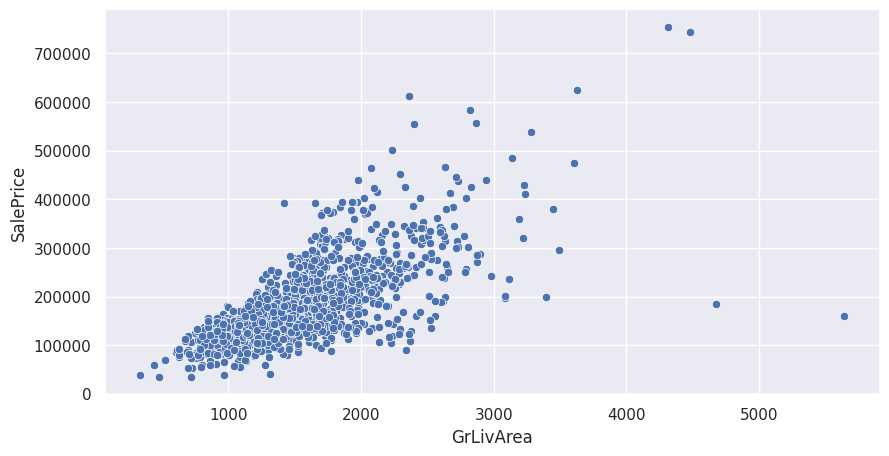

In [212]:
sns.scatterplot(data = train_df, x = 'GrLivArea', y = 'SalePrice')

In [213]:
from scipy import stats
from scipy.stats import norm, skew
import scipy

<Axes: xlabel='SalePrice', ylabel='Density'>

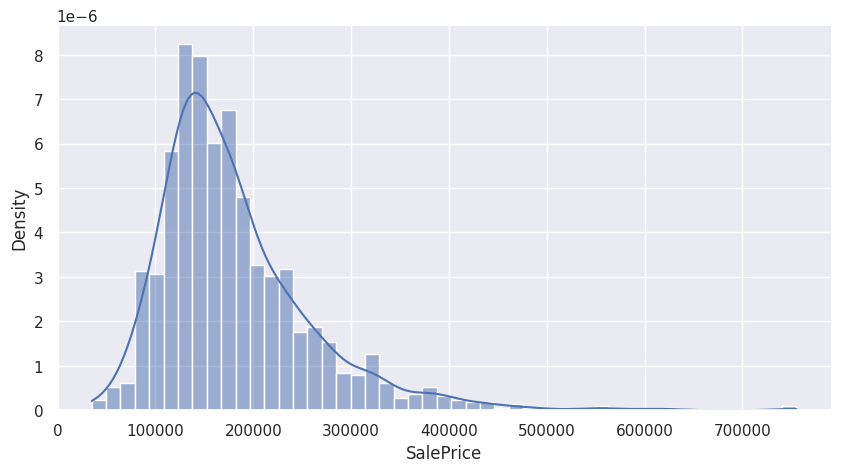

In [214]:
sns.histplot(train_df['SalePrice'], kde=True, stat='density')

We can see that the graph is right skewed. We can do log transformation to make it normally distributed.

In [215]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])


In [315]:
target = train_df['SalePrice']

<Axes: xlabel='SalePrice', ylabel='Density'>

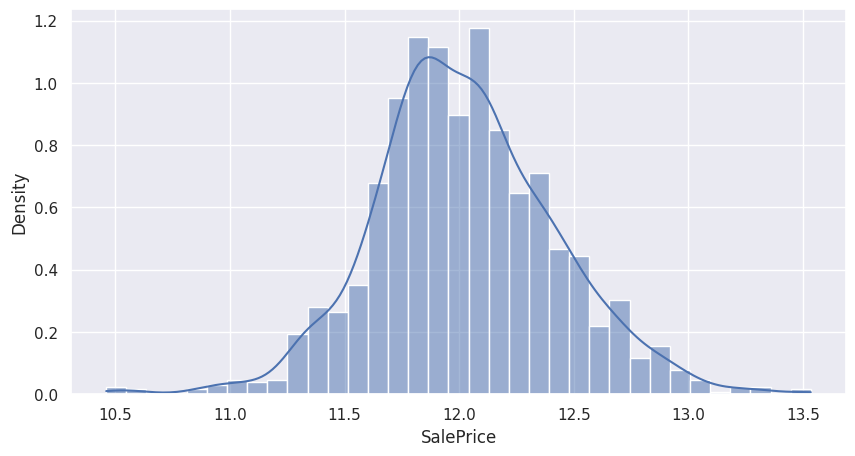

In [216]:
sns.histplot(train_df['SalePrice'], kde=True, stat='density')

Missing Values count

In [217]:
missing_value_percent_per_col = data_all.isna().sum().sort_values(ascending = False) / data_all.shape[0]*100

In [218]:
missing_value_percent_per_col[:20]

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
dtype: float64

<Axes: >

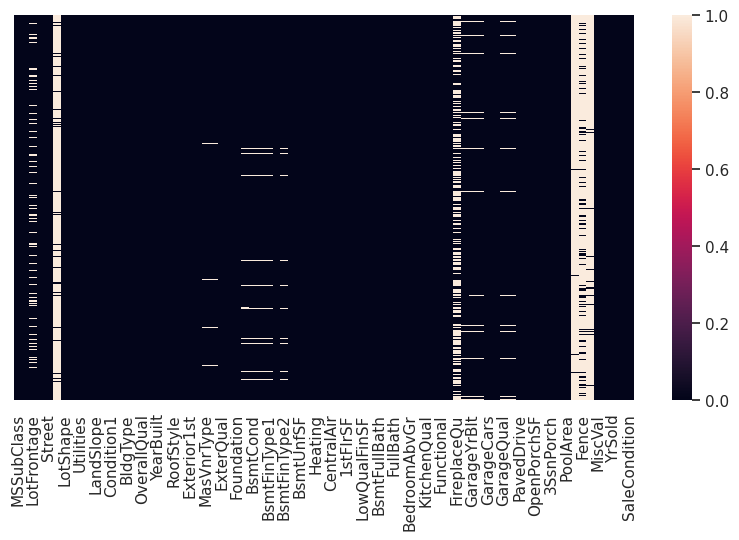

In [219]:
sns.heatmap(data_all.isna(), yticklabels = False)

We can see that there are 4 features that have more than 70% missing values. We can look at the data description to understand these columns and then decide if we want to drop these columns or impute them with appropriate values.

In [220]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [221]:
# Getting numerical and categorical column names separately

numerical = [i for i in data_all.columns if data_all.dtypes[i] != 'object']
categorical = [i for i in data_all.columns if data_all.dtypes[i] == 'object']

In [222]:
print(f'Number of numerical columns : {len(numerical)}')
print(f'Number of categorical columns : {len(categorical)}')

Number of numerical columns : 36
Number of categorical columns : 43


## Missing value treatment

Let's start column by column

**PoolQC**: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In the data description, NA means No Pool. Filling NaN with None.

In [223]:
data_all['PoolQC'] = data_all['PoolQC'].fillna('None')

**MiscFeature**: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [224]:
data_all['MiscFeature'] = data_all['MiscFeature'].fillna('None')

**Alley**: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [225]:
data_all['Alley'] = data_all['Alley'].fillna('None')

**Fence**: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [226]:
data_all['Fence'] = data_all['Fence'].fillna('None')


**FireplaceQu**: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry 


**Fireplace** in basement

       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


From data discription, we find that NaN means no fireplace

In [227]:
data_all['FireplaceQu'] = data_all['FireplaceQu'].fillna('None')

**LotFrontage**: Linear feet of street connected to property

We can assume that in a particular neighborhood, area of houses are similar. Therefore, we can fill missing values by taking the median value per neighborhood.

In [228]:
data_all['LotFrontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: LotFrontage, Length: 128, dtype: int64

In [229]:
data_all['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

<Axes: xlabel='LotFrontage', ylabel='Count'>

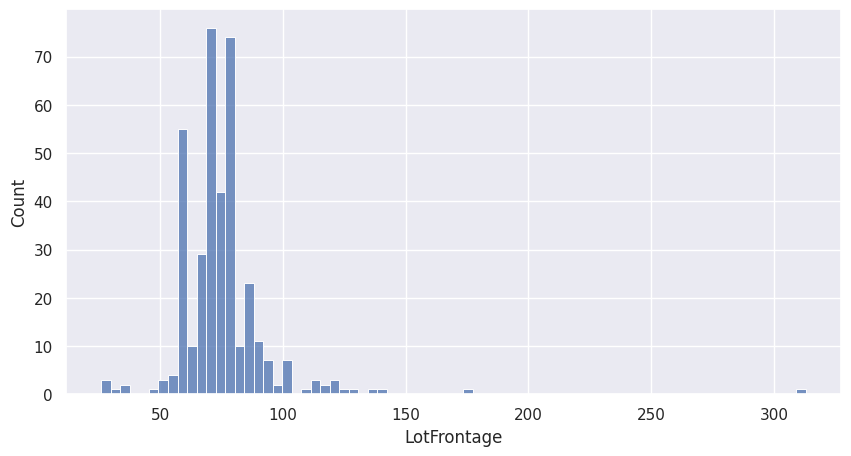

In [230]:
sns.histplot(data_all[data_all['Neighborhood'] == 'NAmes']['LotFrontage'])

In [231]:
data_all[data_all['Neighborhood'] == 'NAmes']['LotFrontage'].describe()

count    375.000000
mean      75.210667
std       19.686198
min       26.000000
25%       66.000000
50%       73.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

In [232]:
# Grouping by neighborhood and filling missing value in LotFrontage with median.
data_all['LotFrontage'] = data_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [233]:
data_all['LotFrontage'].isna().sum()

0

**GarageType**: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

**GarageFinish**: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage


**GarageQual**: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
**GarageCond**: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


**GarageYrBlt**: Year garage was built
		
		
**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet


Wherever there is no garage, we fill missing value with `None` for categorical data and `0` for numerical data.

In [234]:
cat_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in cat_garage:
  data_all[col] = data_all[col].fillna('None')

num_garage = ['GarageYrBlt', 'GarageArea', 'GarageCars']
for col in num_garage:
  data_all[col] = data_all[col].fillna(0)

**BsmtQual**: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (< 70 inches)
       NA	No Basement
		
**BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
**BsmtExposure**: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
**BsmtFinType1**: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		


**BsmtFinType2**: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

**BsmtFinSF2**: Type 2 finished square feet

**BsmtUnfSF**: Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**BsmtFinSF1**: Type 1 finished square feet

**BsmtFullBath**: Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms



For basement categorical features, NA means no basement so we can fill missing value with `None` and for numerical features, We can fill NaN with `0` as it would mean no basement.

In [235]:
cat_basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
num_basement = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

# filling missing value with None
for col in cat_basement:
  data_all[col] = data_all[col].fillna('None')

# filling missing value with 0
for col in num_basement:
  data_all[col] = data_all[col].fillna(0)

**MasVnrType**: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
**MasVnrArea**: Masonry veneer area in square feet

For categorical feature, we can fill missing value with `None` and for numerical area, we can fill missing value with `0`

In [236]:
data_all['MasVnrType'] = data_all['MasVnrType'].fillna('None')
data_all['MasVnrArea'] = data_all['MasVnrArea'].fillna(0)

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [237]:
data_all['MSZoning'].value_counts(dropna = False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

Since only 4 missing values are there, we can fill them with mode value of the column.

In [238]:
data_all['MSZoning'] = data_all['MSZoning'].fillna(data_all['MSZoning'].mode()[0])

**Functional**: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [239]:
data_all['Functional'].value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

Since there are only 2 missing values and from data description, unless deductions are warranted we assume it to be typical. So, filling missing values with `Typ`

In [240]:
data_all['Functional'] = data_all['Functional'].fillna('Typ')

**Utilities**: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [241]:
data_all['Utilities'].value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

Since, there are only 2 missing values and majority of values are `AllPub`. We can drop this feature as it won't give useful information to train the model.

In [242]:
data_all.drop(['Utilities'], axis = 1, inplace = True)

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

In [243]:
[col for col in data_all.columns if 'Kitchen' in col]

['KitchenAbvGr', 'KitchenQual']

In [244]:
data_all['KitchenQual'].value_counts(dropna=False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

Since, there is only one missing value, we can fill it with mode of the column.

In [245]:
data_all['KitchenQual'] = data_all['KitchenQual'].fillna(data_all['KitchenQual'].mode()[0])

**Electrical**: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [246]:
data_all['Electrical'].value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [247]:
data_all['Electrical'] = data_all['Electrical'].fillna(data_all['Electrical'].mode()[0])

In [248]:
# Filling missing values in Exterior1st and Exterior2nd column with their mode value.
data_all['Exterior1st'] = data_all['Exterior1st'].fillna(data_all['Exterior1st'].mode()[0])
data_all['Exterior2nd'] = data_all['Exterior2nd'].fillna(data_all['Exterior2nd'].mode()[0])

In [249]:
data_all['SaleType'].value_counts(dropna=False)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [250]:
# Filling SaleType column with mode value.

data_all['SaleType'] = data_all['SaleType'].fillna(data_all['SaleType'].mode()[0])

In [251]:
data_all.shape

(2919, 78)

In [252]:
(data_all.isna().sum()>0).sum()

0

We can see that there are no columns with missing values now.

**MSSubClass**: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor


**YrSold**: Year Sold (YYYY)

**MoSold**: Month Sold (MM)

The above 4 columns are numerical but they should be categorical after looking at the content in the columns, so we will change there datatypes to string.

In [253]:
data_all[['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']].dtypes

MSSubClass     int64
OverallCond    int64
YrSold         int64
MoSold         int64
dtype: object

In [254]:
# Changing the datatype from int64 to string
num_to_cat = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
for i in num_to_cat:
  data_all[i] = data_all[i].astype(str)

In [255]:
# Getting numerical and categorical column names separately

categorical = [i for i in data_all.columns if data_all.dtypes[i] == 'object']

In [256]:
len(categorical)

46

In [257]:
numerical = [i for i in data_all.columns if data_all.dtypes[i] != 'object']

In [258]:
len(numerical)

32

Some categorical columns contain ordinal data and we can utilize the information contained in their order. 
Performing Label Encoding of those categorical columns.

In [259]:
from sklearn.preprocessing import LabelEncoder

In [260]:
cat_cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 
            'GarageQual', 'GarageCond', 'ExterQual', 
            'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 
            'BsmtFinType1', 'BsmtFinType2', 'Functional', 
            'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
            'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 
            'MSSubClass', 'OverallCond', 'YrSold', 'MoSold']

In [261]:
# Performing label encoding on the above categorical columns
for i in cat_cols:
  label_encoder = LabelEncoder()
  label_encoder.fit(data_all[i])
  data_all[i] = label_encoder.transform(data_all[i])

In [262]:
data_all.shape

(2919, 78)

### Checking skewness of the numerical features.

In [263]:
num_features = [i for i in data_all.columns if data_all[i].dtype != 'object']

In [264]:
skewed_features = data_all[num_features].apply(lambda x: skew(x)).sort_values(ascending = False)

In [ ]:
# Taking all the features with absolute skewness > 1
skewed_features_to_treat = skewed_features[abs(skewed_features) > 1]

In [ ]:
temp_df= data_all.copy(deep = True)

In [265]:
# Transforming the highly skewed features by applying logarithmic transform

for i in skewed_features_to_treat.index:
  temp_df[i] = np.log1p(temp_df[i])

In [289]:
# Getting dummy variables for categorical features
temp_df = pd.get_dummies(temp_df)
temp_df.shape

(2919, 220)

In [295]:
## Splitting the data into training and testing set

train_ = temp_df[:n_train]
test_ = temp_df[n_train:]

In [296]:
train_.shape, test_.shape

((1460, 220), (1459, 220))

### Modelling 

There are numerous algorithms for regression problem. We will be using:



1.   Linear Regression
2.   Random forest regressor
3.   Gradient Boost regressor
4.   XGBOOST regressor





In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [301]:
from sklearn.metrics import mean_squared_error

In [305]:
# Base model
lr_model = LinearRegression()

### K-fold cross-Validation approach

In [302]:
from sklearn.model_selection import KFold, cross_val_score

In [326]:
# Defining an evaluation function root mean squared error.

def rms_error(model):
  kf = KFold(5, shuffle = True, random_state = 0).get_n_splits(train_.values)
  rsme = np.sqrt(-cross_val_score(model, train_.values, target, scoring = 'neg_mean_squared_error', cv = kf))
  return rsme


In [356]:
print(f'Linear regression score: {rms_error(lr_model).mean()}')

Linear regression score: 0.1375641163157589


In [320]:
rf_model = RandomForestRegressor()

In [357]:
print(f'Random Forest Regression score: {rms_error(rf_model).mean()}')

Random Forest Regression score: 0.14362710731341174


In [358]:
gb_model = GradientBoostingRegressor()

In [359]:
print(f'Gradient Boosting Regression score: {rms_error(gb_model).mean()}')

Gradient Boosting Regression score: 0.12717773801044263


In [360]:
xgb_model = xgb.XGBRegressor()

In [361]:
print(f'XGBOOST Regression score: {rms_error(xgb_model).mean()}')

XGBOOST Regression score: 0.1395160005872495


# Hyperparameter tunning and optimal model selection

In [338]:
def best_model_finder(X, y):
    algorithm = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'random_forest_regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'min_samples_split': [10, 12]
                
            }
        },
        'gradient_boost_regressor': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'loss': ['huber'],
                'min_samples_split': [10, 12]
                
            }
        },
        'xgboost_regressor': {
            'model': xgb.XGBRegressor(),
            'params': {
                'max_depth': [4, 5],
                'n_estimators': [100, 200]
                
            }
        }
    }
    scores = []
    kf = KFold(3, shuffle = True, random_state = 0).get_n_splits(train_.values)
    for algo_name, config in algorithm.items():
        gscv = GridSearchCV(config['model'], config['params'], cv = kf, return_train_score = False, scoring = 'neg_mean_squared_error')
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [339]:
best_model_finder(train_, target)

,model,best_score,best_params
0,linear_regression,-0.018135,{'fit_intercept': False}
1,random_forest_regressor,-0.021499,"{'min_samples_split': 10, 'n_estimators': 100}"
2,gradient_boost_regressor,-0.015449,"{'loss': 'huber', 'min_samples_split': 12, 'n_..."
3,xgboost_regressor,-0.018540,"{'max_depth': 4, 'n_estimators': 200}"


We see that gradient boost regressor has the minimum absolute error. we will choose gradient boost regressor as our final model.

In [341]:
# Final Model
final_model = GradientBoostingRegressor(n_estimators=200, min_samples_split=12, 
                                   loss='huber')

In [344]:
final_model.fit(train_, target)

GradientBoostingRegressor(loss='huber', min_samples_split=12, n_estimators=200)

In [363]:
print(f'Final_model score: {rms_error(final_model).mean()}')

Final_model score: 0.12479911788443583


In [345]:
# Getting the predictions for the testing set 
predictions = final_model.predict(test_)

In [346]:
# These predictions are the logarithms of the predicted SalePrice
predictions

array([11.70907358, 11.93393701, 12.13037871, ..., 11.94761788,
       11.67276546, 12.33613059])

In [348]:
# Converting the Predictions into SalePrice
final_submission = np.exp(predictions)

In [349]:
submission = pd.read_csv('/content/sample_submission.csv')

In [353]:
submission['SalePrice'] = final_submission

In [354]:
submission.head()

,Id,SalePrice
0,1461,121670.709913
1,1462,152350.187197
2,1463,185419.983074
3,1464,189114.977725
4,1465,189646.044550


In [355]:
submission.to_csv('submission.csv', index=False)